In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import pprint
from collections import Counter
import itertools
import seaborn as sns

In [11]:
# Data file path
us_path = "resources/US_youtube_trending_data.csv"
gb_path = "resources/GB_youtube_trending_data.csv"
ca_path = "resources/CA_youtube_trending_data.csv"

# Convert data into pandas dataframe
df_us = pd.read_csv(us_path)
df_gb = pd.read_csv(gb_path)
df_ca = pd.read_csv(ca_path)

# Drop unnecessary rows 
df_us.drop(['channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'], inplace=True, axis=1)
df_gb.drop(['channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'], inplace=True, axis=1)
df_ca.drop(['channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'], inplace=True, axis=1)

# Add country row for later comparison
df_us['country'] = 'US'
df_gb['country'] = 'GB'
df_ca['country'] = 'CA'

frames = [df_us, df_gb, df_ca]

# Merge all three dataframes
df_merge = pd.concat(frames)

# Export to csv
df_merge.to_csv("merge_US_GB_CA.csv", index=None)

FileNotFoundError: [Errno 2] No such file or directory: 'resources/US_youtube_trending_data.csv'

In [ ]:
# Possible only get the unique titles
#df_us["title"].unique()

#df_us.head()

In [ ]:
df_us['categoryId'] = df_us['categoryId'].replace([24,10,20,17,22,23,28,26,25,1,27,2,19,15,29],
                                               ["Entertainment","Music","Gaming","Sports","People & Blogs","Comedy","Science & Technology",
                                               "Howto & Style","News & Politics","Film & Animation","Education","Autos & Vehicles","Travel & Events",
                                               "Pets & Animals","Nonprofits & Activism"])
df_ca['categoryId'] = df_ca['categoryId'].replace([24,10,20,17,22,23,28,26,25,1,27,2,19,15,29],
                                               ["Entertainment","Music","Gaming","Sports","People & Blogs","Comedy","Science & Technology",
                                               "Howto & Style","News & Politics","Film & Animation","Education","Autos & Vehicles","Travel & Events",
                                               "Pets & Animals","Nonprofits & Activism"])
df_gb['categoryId'] = df_gb['categoryId'].replace([24,10,20,17,22,23,28,26,25,1,27,2,19,15,29],
                                               ["Entertainment","Music","Gaming","Sports","People & Blogs","Comedy","Science & Technology",
                                               "Howto & Style","News & Politics","Film & Animation","Education","Autos & Vehicles","Travel & Events",
                                               "Pets & Animals","Nonprofits & Activism"])

In [ ]:
df_us.head()

In [ ]:
# Lowercase title and tags columns 
df_merge['tags'] = df_merge['tags'].str.lower()
df_merge['title'] = df_merge['title'].str.lower()
df_merge['description'] = df_merge['description'].str.lower()

df_merge.head()

In [ ]:
type(df_merge['categoryId'])

In [ ]:
# Splitting tag and title contents for easier parsing
df_merge['tag content'] = df_merge['tags'].str.split("|")
df_merge['title content'] = df_merge['title'].str.split()
df_merge['description content'] = df_merge['description'].str.split()

In [ ]:
#Create total frequency count of individual words in title 
title_list = df_merge['title content'].to_list()
all_title_counts = dict(Counter(itertools.chain.from_iterable(df_merge['title content'].to_list())))

#Convert to dataframe and sort
df_title = pd.DataFrame(list(all_title_counts.items()),columns = ['word','count']) 
df_title.sort_values(by='count', ascending=False)

In [ ]:
#Create total frequency count of individual tags 
df_merge['tag content'].to_list()
tag_counts = dict(Counter(itertools.chain.from_iterable(df_merge['tag content'].to_list())))

#Convert to dataframe and sort
df_tags = pd.DataFrame(list(tag_counts.items()),columns = ['tag','count']) 
df_tags = df_tags.sort_values(by='count', ascending=False)


In [ ]:
df_pub = df_merge['publishedAt']
df_pub.head(20)

In [ ]:
# Getting the total word count of video title (title length)
df_merge['total count title'] = df_merge['title'].str.split().str.len()

# Getting the total tag count of video tags (tag length)
df_merge['total count tag'] = df_merge['tags'].str.split("|").str.len()

df_merge.head()

In [ ]:

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol']

# Create empty list to fill with tumor vol data (for plotting)
vol_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    vol_final = df_merge['total count title'].loc[df_merge['country'] == treatment] 
    vol_tumor.append(vol_final)


# Title Count Boxplots

NameError: name 'df_merge' is not defined

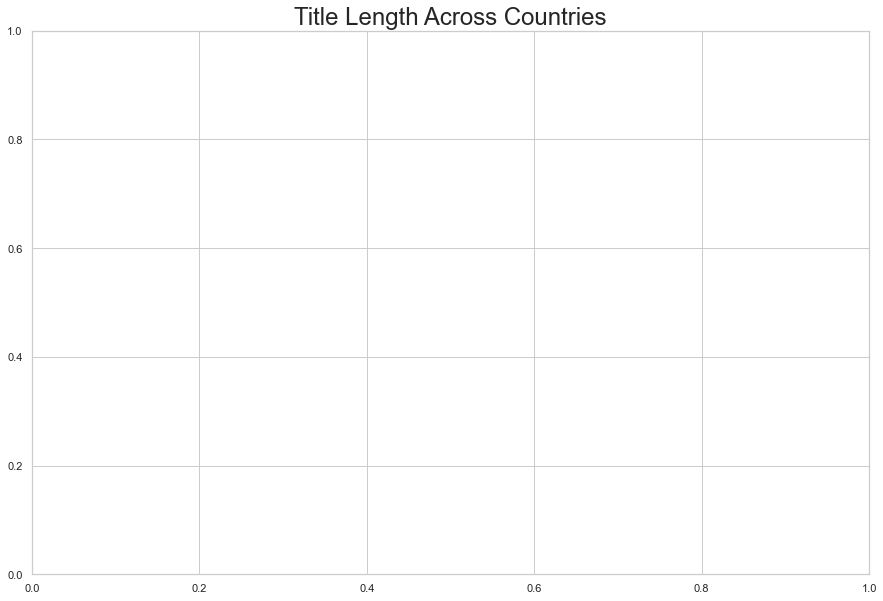

In [12]:
my_pal = {"US": "b", "GB": "g", "CA":"r"}
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle("")
ax.set_title("Title Length Across Countries", fontdict={'fontsize':24})
sns.boxplot(x=df_merge["country"], y=df_merge["total count title"], palette=my_pal)

ax.set_xlabel("Countries", fontdict={'fontsize':24})
ax.set_ylabel("Title Length", fontdict={'fontsize':24})

plt.savefig("TitleCountBoxplot.png")
plt.show()

In [ ]:
usa = df_merge[df_merge["country"] == 'US']
title_usa = usa['total count title']

gb = df_merge[df_merge["country"] == 'GB']
title_gb = gb['total count title']

ca = df_merge[df_merge["country"] == 'CA']
title_ca = ca['total count title']

In [13]:
# Quartile calculations for title length US
us_quartiles = title_usa.quantile([.25,.5,.75])
lowerq = us_quartiles[0.25]
upperq = us_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of US title length is: {lowerq}")
print(f"The upper quartile of US title length is: {upperq}")
print(f"The interquartile range of US title length is: {iqr}")
print(f"The the median of US title length is: {us_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

NameError: name 'title_usa' is not defined

In [14]:
# Quartile calculations for title length GB
gb_quartiles = title_gb.quantile([.25,.5,.75])
gb_lowerq = gb_quartiles[0.25]
gb_upperq = gb_quartiles[0.75]
gb_iqr = gb_upperq-gb_lowerq

print(f"The lower quartile of GB title length is: {gb_lowerq}")
print(f"The upper quartile of GB title length is: {gb_upperq}")
print(f"The interquartile range of GB title length is: {gb_iqr}")
print(f"The the median of GB title length is: {gb_quartiles[0.5]} ")

gb_lower_bound = gb_lowerq - (1.5*gb_iqr)
gb_upper_bound = gb_upperq + (1.5*gb_iqr)
print(f"Values below {gb_lower_bound} could be outliers.")
print(f"Values above {gb_upper_bound} could be outliers.")


NameError: name 'title_gb' is not defined

In [15]:
# Quartile calculations for title length CA
ca_quartiles = title_ca.quantile([.25,.5,.75])
ca_lowerq = ca_quartiles[0.25]
ca_upperq = ca_quartiles[0.75]
ca_iqr = ca_upperq-ca_lowerq

print(f"The lower quartile of CA title length is: {ca_lowerq}")
print(f"The upper quartile of CA title length is: {ca_upperq}")
print(f"The interquartile range of CA title length is: {ca_iqr}")
print(f"The the median of CA title length is: {quartiles[0.5]} ")

ca_lower_bound = ca_lowerq - (1.5*ca_iqr)
ca_upper_bound = ca_upperq + (1.5*ca_iqr)
print(f"Values below {ca_lower_bound} could be outliers.")
print(f"Values above {ca_upper_bound} could be outliers.")

NameError: name 'title_ca' is not defined

# Tag Count Boxplots

NameError: name 'df_merge' is not defined

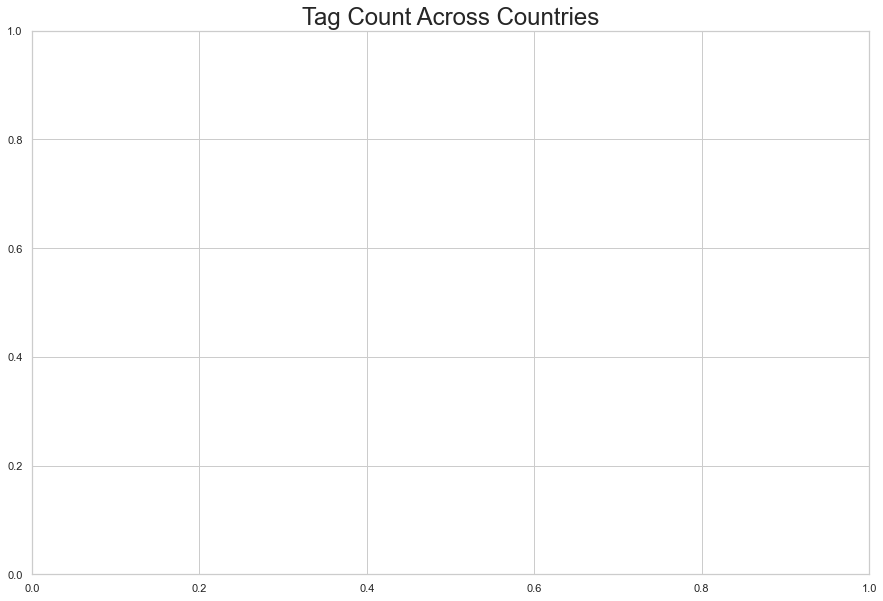

In [16]:
# Boxplot of tag count
my_pal = {"US": "b", "GB": "g", "CA":"r"}
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle("")
ax.set_title("Tag Count Across Countries", fontdict={'fontsize':24})
sns.boxplot(x=df_merge["country"], y=df_merge["total count tag"], palette=my_pal)

ax.set_xlabel("Countries", fontdict={'fontsize':24})
ax.set_ylabel("Tag Count", fontdict={'fontsize':24})

plt.savefig("TagCountBoxplot.png")
plt.show()

In [ ]:
usa = df_merge[df_merge["country"] == 'US']
tag_usa = usa['total count tag']

gb = df_merge[df_merge["country"] == 'GB']
tag_gb = gb['total count tag']

ca = df_merge[df_merge["country"] == 'CA']
tag_ca = ca['total count tag']

In [17]:
# Quartile calculations for title length US
us_tag_quartiles = tag_usa.quantile([.25,.5,.75])
us_tag_lowerq = us_tag_quartiles[0.25]
us_tag_upperq = us_tag_quartiles[0.75]
us_tag_iqr = us_tag_upperq-us_tag_lowerq

print(f"The lower quartile of US title length is: {us_tag_lowerq}")
print(f"The upper quartile of US title length is: {us_tag_upperq}")
print(f"The interquartile range of US title length is: {us_tag_iqr}")
print(f"The the median of US title length is: {us_tag_quartiles[0.5]} ")

us_tag_lower_bound = us_tag_lowerq - (1.5*us_tag_iqr)
us_tag_upper_bound = us_tag_upperq + (1.5*us_tag_iqr)
print(f"Values below {us_tag_lower_bound} could be outliers.")
print(f"Values above {us_tag_upper_bound} could be outliers.")

NameError: name 'tag_usa' is not defined

In [18]:
# Quartile calculations for title length GB
gb_tag_quartiles = tag_gb.quantile([.25,.5,.75])
gb_tag_lowerq = gb_tag_quartiles[0.25]
gb_tag_upperq = gb_tag_quartiles[0.75]
gb_tag_iqr = gb_tag_upperq-gb_tag_lowerq

print(f"The lower quartile of US title length is: {gb_tag_lowerq}")
print(f"The upper quartile of US title length is: {gb_tag_upperq}")
print(f"The interquartile range of US title length is: {gb_tag_iqr}")
print(f"The the median of US title length is: {gb_tag_quartiles[0.5]} ")

gb_tag_lower_bound = gb_tag_lowerq - (1.5*gb_tag_iqr)
gb_tag_upper_bound = gb_tag_upperq + (1.5*gb_tag_iqr)
print(f"Values below {gb_tag_lower_bound} could be outliers.")
print(f"Values above {gb_tag_upper_bound} could be outliers.")

NameError: name 'tag_gb' is not defined

In [19]:
# Quartile calculations for title length CA
ca_tag_quartiles = tag_ca.quantile([.25,.5,.75])
ca_tag_lowerq = ca_tag_quartiles[0.25]
ca_tag_upperq = ca_tag_quartiles[0.75]
ca_tag_iqr = ca_tag_upperq-ca_tag_lowerq

print(f"The lower quartile of US title length is: {ca_tag_lowerq}")
print(f"The upper quartile of US title length is: {ca_tag_upperq}")
print(f"The interquartile range of US title length is: {ca_tag_iqr}")
print(f"The the median of US title length is: {ca_tag_quartiles[0.5]} ")

ca_tag_lower_bound = ca_tag_lowerq - (1.5*ca_tag_iqr)
ca_tag_upper_bound = ca_tag_upperq + (1.5*ca_tag_iqr)
print(f"Values below {ca_tag_lower_bound} could be outliers.")
print(f"Values above {ca_tag_upper_bound} could be outliers.")

NameError: name 'tag_ca' is not defined

In [20]:


# Published Times Analysis 

# Remove the dates, mins, and seconds in 'publshedAt' column 
df_us['publishedAt'] = df_us['publishedAt'].str[10:]
df_us['publishedAt'] = df_us['publishedAt'].str[:3]

df_gb['publishedAt'] = df_gb['publishedAt'].str[10:]
df_gb['publishedAt'] = df_gb['publishedAt'].str[:3]

df_ca['publishedAt'] = df_ca['publishedAt'].str[10:]
df_ca['publishedAt'] = df_ca['publishedAt'].str[:3]

NameError: name 'df_us' is not defined

In [21]:
# Create a dataframe with published time counts
time_counts_us = df_us['publishedAt'].value_counts().to_dict()
time_counts_gb = df_gb['publishedAt'].value_counts().to_dict()
time_counts_ca = df_ca['publishedAt'].value_counts().to_dict()
time_counts_ca

NameError: name 'df_us' is not defined

In [22]:
df_ca_time = pd.DataFrame(list(time_counts_ca.items()),columns = ['time','count']).sort_values(by=['time']) 
df_gb_time = pd.DataFrame(list(time_counts_gb.items()),columns = ['time','count']).sort_values(by=['time'])  
df_us_time = pd.DataFrame(list(time_counts_us.items()),columns = ['time','count']).sort_values(by=['time']) 

NameError: name 'time_counts_ca' is not defined

In [23]:
x_ticks = []

x_axis = df_us_time['time']
y_axis = df_us_time['count']

x_axis2 = df_ca_time['time']
y_axis2 = df_ca_time['count']

x_axis3 = df_gb_time['time']
y_axis3 = df_gb_time['count']

NameError: name 'df_us_time' is not defined

In [24]:
plt.figure(figsize=(12, 6))

us_avg, = plt.plot(x_axis, y_axis, color="blue", label="United States" )
gb_avg, = plt.plot(x_axis3, y_axis3, color="green", label="Great Britain" )
ca_avg, = plt.plot(x_axis2, y_axis2, color="red", label="Canada" )

plt.xlabel("Published Time")
plt.ylabel("Upload Count")
plt.title("Published Times Across Countries")
plt.xticks([0, 2, 4,6,8,10,12,14,16,18,20,22], 
           ['12AM', '2AM','4AM','6AM','8AM','10AM','12PM','2PM','4PM','6PM','8PM', '10PM'])


plt.legend(handles=[us_avg, gb_avg, ca_avg], loc="best")

NameError: name 'x_axis' is not defined

<Figure size 864x432 with 0 Axes>

In [25]:
df_us.head()

NameError: name 'df_us' is not defined

In [26]:
# Create a dataframe with categoryId counts
category_counts_us = df_us['categoryId'].value_counts().to_dict()
category_counts_gb = df_gb['categoryId'].value_counts().to_dict()
category_counts_ca = df_ca['categoryId'].value_counts().to_dict()


NameError: name 'df_us' is not defined

In [27]:
category_counts_gb

NameError: name 'category_counts_gb' is not defined

In [28]:
df_ca_cat = pd.DataFrame(list(category_counts_ca.items()),columns = ['category','count']) 
df_gb_cat = pd.DataFrame(list(category_counts_gb.items()),columns = ['category','count'])  
df_us_cat = pd.DataFrame(list(category_counts_us.items()),columns = ['category','count']) 

df_gb_cat

NameError: name 'category_counts_ca' is not defined

In [29]:
# Define the sorter
sorter = ['Music', 'Entertainment', 'Gaming', 'Sports', 'People & Blogs', 'Comedy', 'Science & Technology', 'News & Politics',
          'Howto & Style','Film & Animation','Education', 'Autos & Vehicles', 'Pets & Animals', 
          'Travel & Events', 'Nonprofits & Activism']

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter, range(len(sorter))))

# Generate a rank column that will be used to sort
# the dataframe numerically
df_ca_cat['Tm_Rank'] = df_ca_cat['category'].map(sorterIndex)
df_us_cat['Tm_Rank'] = df_us_cat['category'].map(sorterIndex)
df_gb_cat['Tm_Rank'] = df_gb_cat['category'].map(sorterIndex)

# Here is the result asked with the lexicographic sort
# Result may be hard to analyze, so a second sorting is
# proposed next
## NOTE: 
## Newer versions of pandas use 'sort_values' instead of 'sort'
df_ca_cat.sort_values(['Tm_Rank'], ascending=True, inplace = True)
df_ca_cat.drop('Tm_Rank', 1, inplace = True)

df_us_cat.sort_values(['Tm_Rank'], ascending=True,inplace = True)
df_us_cat.drop('Tm_Rank', 1, inplace = True)

df_gb_cat.sort_values(['Tm_Rank'], ascending=True,inplace = True)
df_gb_cat.drop('Tm_Rank', 1, inplace = True)
print(df_us_cat)


NameError: name 'df_ca_cat' is not defined

In [30]:
x_ticks = []

x_axis4 = df_us_cat['category']
y_axis4 = df_us_cat['count']

x_axis5 = df_gb_cat['category']
y_axis5 = df_gb_cat['count']

x_axis6 = df_ca_cat['category']
y_axis6 = df_ca_cat['count']

NameError: name 'df_us_cat' is not defined

In [31]:
# create data

ind = np.arange(15) 
width = 0.25

 
# Make the plot
plt.figure(figsize=(12, 10))

plt.barh(ind, y_axis4, color='blue', height=barWidth)
plt.barh(ind+width, y_axis5, color='green', height=barWidth)
plt.barh(ind+width*2, y_axis6, color='red', height=barWidth)
plt.gca().invert_yaxis()

plt.xlabel("Upload Count")
plt.ylabel("Category")
plt.title("Popular Categories Across Countries")
plt.yticks(np.arange(15),['Music', 'Entertainment', 'Gaming', 'Sports', 'People & Blogs', 'Comedy', 'Science & Technology', 'News & Politics',
          'Howto & Style','Film & Animation','Education', 'Autos & Vehicles', 'Pets & Animals', 
          'Travel & Events', 'Nonprofits & Activism'])

plt.legend(handles=[us_avg, gb_avg, ca_avg], loc="lower right")
plt.show()

NameError: name 'y_axis4' is not defined

<Figure size 864x720 with 0 Axes>

In [32]:
plt.figure(figsize=(12, 6))


us_avg, = plt.plot(x_axis4, y_axis4, color="blue", label="United States" )
gb_avg, = plt.plot(x_axis4, y_axis5, color="green", label="Great Britain" )
ca_avg, = plt.plot(x_axis4, y_axis6, color="red", label="Canada" )



plt.xlabel("Category")
plt.ylabel("Upload Count")
plt.title("Popular Categories Across Countries")

plt.legend(handles=[us_avg, gb_avg, ca_avg], loc="best")

NameError: name 'x_axis4' is not defined

<Figure size 864x432 with 0 Axes>